## Spotify

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [4]:
spotify = pd.read_csv("./src/tracks.csv", low_memory=False)
print(spotify.shape)
spotify.columns

(586672, 20)


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
def format_sample_df(df):
    df['artists'] = df['artists'].apply(lambda x: x[2:-2])
    df.rename(columns={'name':'track'}, inplace=True)
    cols1 = ['track','artists','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness']
    cols2 = ['liveness','valence','tempo','duration_ms','popularity','explicit','release_date']
    return df[cols1+cols2]

In [6]:
spotify = format_sample_df(spotify)
spotify.head()

,track,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,explicit,release_date
0,Carve,Uli,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,126903,6,0,1922-02-22
1,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,98200,0,0,1922-06-01
2,Vivo para Quererte - Remasterizado,Ignacio Corsini,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,181640,0,0,1922-03-21
3,El Prisionero - Remasterizado,Ignacio Corsini,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,176907,0,0,1922-03-21
4,Lady of the Evening,Dick Haymes,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,163080,0,0,1922


### Création d'un sous-ensemble

In [7]:
spotify['mode'].unique(), spotify['explicit'].unique()

(array([1, 0]), array([0, 1]))

`mode` et `unique` sont des **booleans** donc nous ne les gardons pas. Nous allons garder que les variables qui ont des **valeurs entre 0 et 1**

In [8]:
spotify.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,explicit
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,5.866720e+05,586672.000000,586672.000000
mean,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,2.300512e+05,27.570053,0.044086
std,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,1.265261e+05,18.370642,0.205286
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.344000e+03,0.000000,0.000000
25%,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,1.750930e+05,13.000000,0.000000
50%,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,2.148930e+05,27.000000,0.000000
75%,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,2.638670e+05,41.000000,0.000000
max,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.621218e+06,100.000000,1.000000


les variables qui ont des **valeurs entre 0 et 1** sont:</br>
* `danceability`
* `energy`
* `speechiness`
* `acousticness`
* `instrumentalness`
* `liveness`
* `valence`

In [9]:
vars = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
spotify_01 = spotify.filter(vars)
spotify_01.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.645,0.4450,0.4510,0.674,0.7440,0.151,0.127
1,0.695,0.2630,0.9570,0.797,0.0000,0.148,0.655
2,0.434,0.1770,0.0512,0.994,0.0218,0.212,0.457
3,0.321,0.0946,0.0504,0.995,0.9180,0.104,0.397
4,0.402,0.1580,0.0390,0.989,0.1300,0.311,0.196


Nous allons garder que 40.000 samples pour cet exercice

In [10]:
spotify_sample = spotify_01.sample(40000)

### Réduction des données à 100 classes avec `k-means`

On va réduire les 40000 sings en 100 classes, en espérant que la perte d'informations soit minime.

In [11]:
kmeans_100 = KMeans(n_clusters = 100, n_init='auto').fit(spotify_sample)

### Part d'inertie expliquée avec 100 classes

On remarque ici qu'on ne perd que moins de 11% de l'information en réduisant en 100 classes.

In [12]:
# un seul cluster
kmeans_1 = KMeans(n_clusters = 1, n_init='auto').fit(spotify_sample)

# on fait le pourcentage des clusters 
# plus il y a de clusters et plus l'inertie est grande

part_100 = 1 - kmeans_100.inertia_ / kmeans_1.inertia_
print("Part : " + str(round(part_100 * 100, 2)) + "%")

Part : 89.03%


In [13]:
kmeans_1.inertia_, kmeans_100.inertia_

(16704.657481604605, 1831.9479586339744)

Pour rappel, `kmeans.inertia_` mesure la **somme des distances au carré des échantillons au centre du cluster le plus proche**, ce qui est la **somme des carrés des écarts intra-clusters(SSE)**. 

L'inertie est une mesure de la qualité du clustering et elle est utilisée pour évaluer la performance du modèle. **Plus l'inertie est faible, meilleure est la qualité du clustering**. Cela signifie que les échantillons dans chaque cluster sont proches les uns des autres et que les centres des clusters sont également bien séparés.

L'inertie est calculée en prenant la somme des distances au carré de chaque point à son centre de cluster attribué, pour tous les échantillons dans le dataset. L'attribut `kmeans.inertia_` renvoie cette somme. En général, il est conseillé de choisir un modèle K-means qui **minimise l'inertie**, mais cette mesure doit être utilisée en conjonction avec d'autres mesures de performance pour évaluer la qualité globale du clustering.

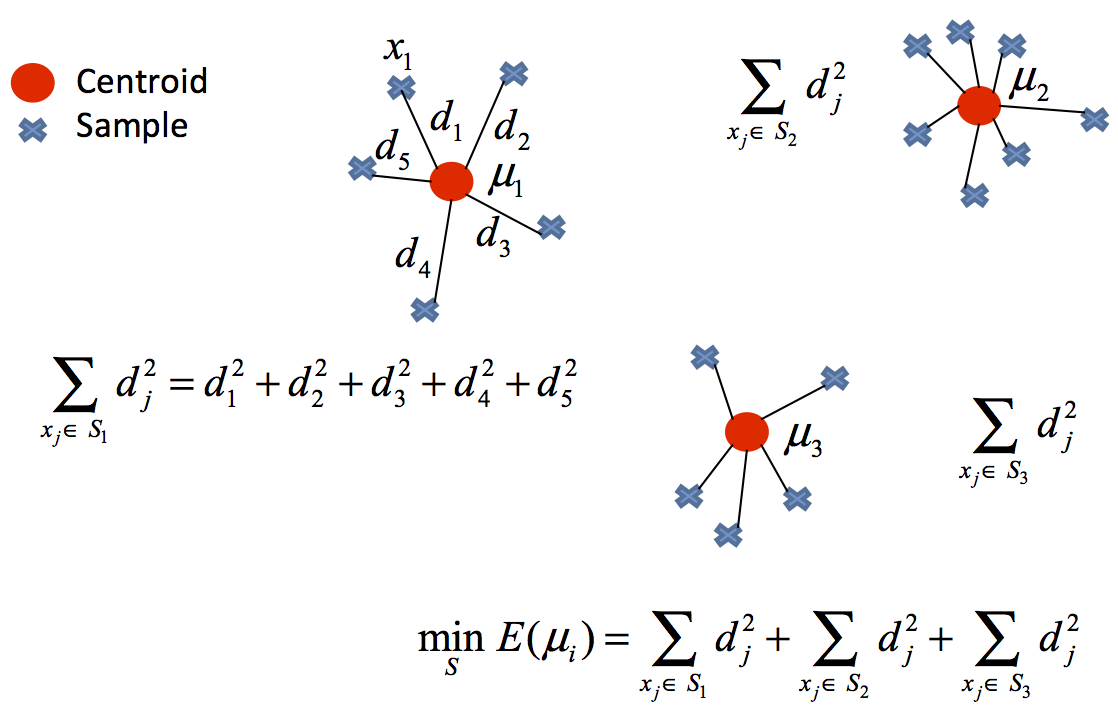

### Centres des 100 classes

On récupère les 100 centres des classes, afin de les utiliser par la suite pour la recherche du nombre de classes.

In [14]:
centres_100 = pd.DataFrame(kmeans_100.cluster_centers_, columns = spotify_01.columns)
centres_100

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.811800,0.539819,0.093686,0.079124,0.015200,0.119311,0.621377
1,0.446672,0.348527,0.048699,0.892853,0.021368,0.143708,0.591697
2,0.472235,0.887118,0.078645,0.045571,0.013111,0.354582,0.664335
3,0.216676,0.088388,0.041177,0.952486,0.875289,0.127384,0.091441
4,0.407502,0.563988,0.046399,0.439134,0.008238,0.142954,0.275367
...,...,...,...,...,...,...,...
95,0.327249,0.306542,0.038088,0.546144,0.016578,0.161266,0.185953
96,0.548079,0.683287,0.064397,0.359866,0.010773,0.133023,0.870439
97,0.566067,0.346603,0.042607,0.388385,0.008439,0.139614,0.253302
98,0.707013,0.826244,0.073220,0.068434,0.010202,0.127045,0.654167


### Choix du nombre de classes

Ici, nous allons utiliser 2 méthodes pour rechercher le nombre de classes, en utilisant les 100 centres de classes :

* CAH avec l'analyse du dendrogramme
* Calcul des *r*$^2$ et *PseudoF* pour $K=1,...,10$ avec **k**-means

#### Dendrogramme

A la lecture de celui-ci, on est en droit d'hésiter entre 2 et 4 classes.

In [15]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean')
hac.fit(centres_100)

AgglomerativeClustering(distance_threshold=0, metric='euclidean',
                        n_clusters=None)

* **distance_threshold** : float, par default=`None`</br>
Le seuil de distance de liaison auquel ou au-dessus duquel les clusters ne seront pas fusionnés. Si pas `None`, **n_clusters** doit être `None` et **compute_full_tree** doit être `True`

* **n_clusters** : int or `None`, default=2</br>
Le nombre de clusters à trouver. IL doit être à `None` si distance_threshold n'est pas `None`.

* **metric** : str ou callable, default=`None`</br>
La métrique à utiliser lors du calcul de la distance entre les instances dans un feature array. Si metric est une string ou callable, il doit s'agir de l'une des options autorisées par `sklearn.metrics.pairwise_distances` pour son paramètre **metric**. Si le lien est « `ward` », seul « `euclidien` » est accepté. Si "`precomputed`", une matrice de distance (au lieu d'une matrice de similarité) est nécessaire comme input pour la méthode fit.


`AgglomerativeClustering` est un algorithme de clustering hiérarchique agglomératif disponible dans la bibliothèque Python scikit-learn. L'algorithme commence par considérer **chaque échantillon comme son propre cluster**, puis **fusionne itérativement les paires de clusters les plus similaires jusqu'à ce qu'un seul cluster soit créé**.

La similarité entre deux clusters est déterminée par une métrique de distance spécifiée, telle que la distance euclidienne ou la corrélation. L'algorithme peut être configuré pour utiliser différentes stratégies de liaison pour calculer la similarité entre les clusters. Les stratégies de liaison les plus courantes sont la liaison simple, la liaison complète et la liaison moyenne.

L'algorithme produit une hiérarchie de clusters imbriqués, appelée dendrogramme, qui peut être coupée à différents niveaux pour produire un clustering plat. Lorsque le dendrogramme est coupé à un niveau spécifique, chaque cluster dans la partition finale contient tous les échantillons qui sont plus similaires entre eux que tout autre échantillon dans un autre cluster.

L'avantage de l'agglomération hiérarchique est qu'elle ne nécessite pas de spécifier le nombre de clusters à l'avance, mais cela peut également rendre l'algorithme plus lent que les méthodes de clustering basées sur les centres, telles que K-means, en particulier sur de grands ensembles de données.

In [16]:
print(hac.children_.shape)

(99, 2)


In [17]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # On cree une matrice de liaison, puis on trace le dendrogram

    # On va compter le nombre de samples sous chaque node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # On affiche le dendrogram correspondant
    dendrogram(linkage_matrix, **kwargs)

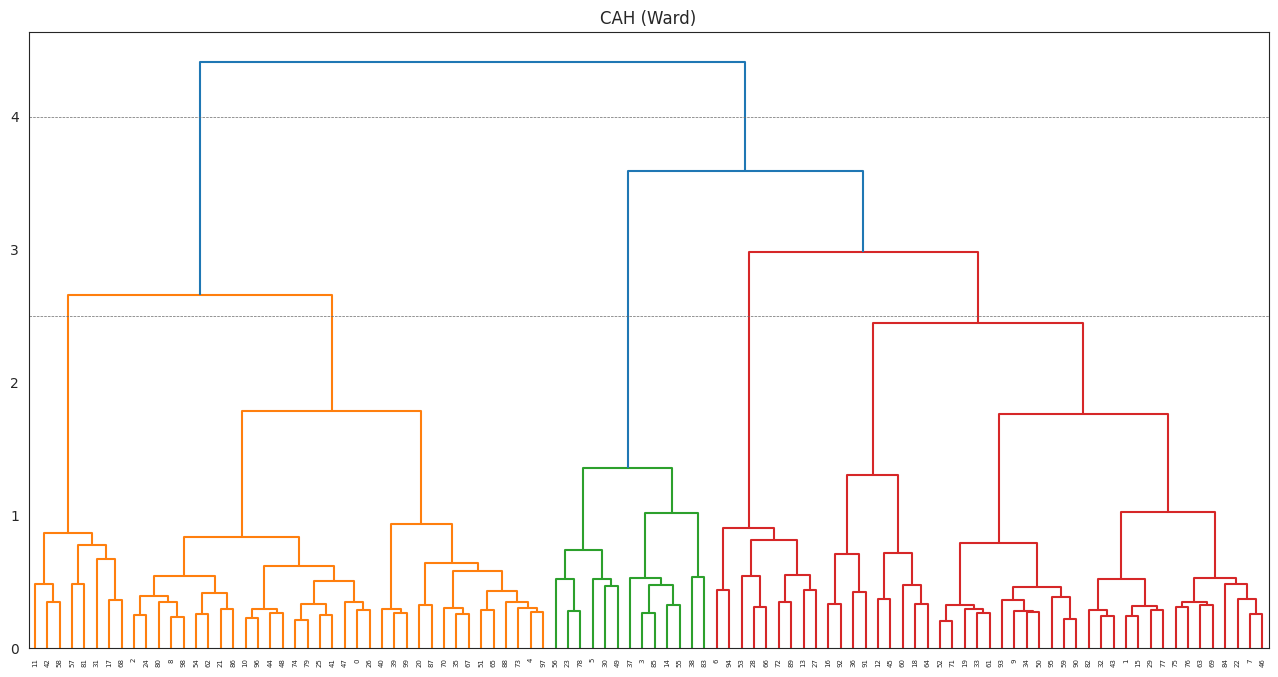

In [18]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 4, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 2.5, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

### Et avec r² et *PseudoF*

Le premier critère, r², n'est pas totalement utile pour choisir entre 2 et 4 classes. Au contraire, la lecture du *PseudoF* nous indique qu'il faut clairement choisir 4 classes.

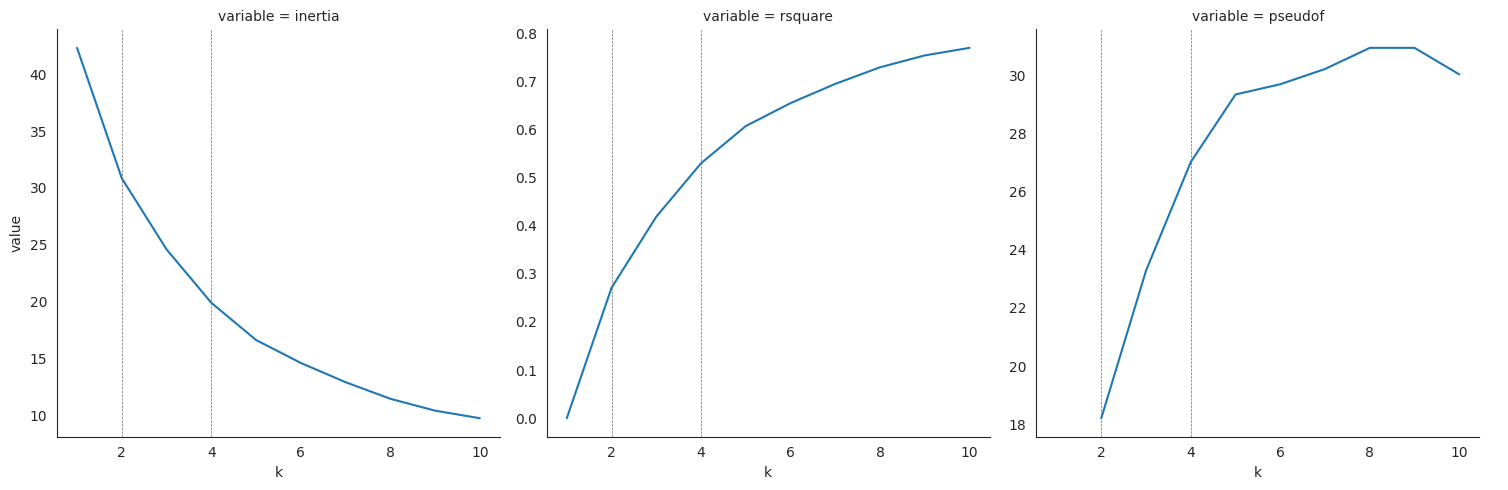

In [19]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(centres_100)
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pd.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (centres_100.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
g.map(plt.axvline, x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
g.map(plt.axvline, x = 4, linewidth = .5, color = "dimgray", linestyle = "--")
g.add_legend()
plt.show()

#### Conclusion
On va plutôt choisir $K=4$ classes

### Calcul de la partition avec k-means

Pour calculer notre partition à 4 classes, nous utilisons donc **k**-means, en le lançant plusieurs fois avec une initialisation aléatoire. Le paramètre `random_state` permet d'utiliser toujours la même suite de nombre aléatoire (ce qui est utile pour la reproduction de ce notebook, mais pas forcément dans un cadre professionnel).

In [20]:
kmeans_4 = KMeans(n_clusters=4, init="random", n_init=20, random_state=123456)
kmeans_4 = kmeans_4.fit(spotify_sample)

### Part d'inertie expliquée avec 4 classes

En réduisant les données en 4 classes, nous ne gardons au final que 54% de l'information, ce qui est tout de même important.

In [21]:
part_4 = 1 - kmeans_4.inertia_ / kmeans_1.inertia_
print("Part : " + str(round(part_4 * 100, 2)) + "%")

Part : 50.56%


### Description des classes

En analysant les centres des classes, ainsi que les différents graphiques ci-dessous, nous remarquons que les classes se caractèrisent ainsi :

* **classe 0** : chansons peu énergiques, mais plutôt acoustiques et instrumentales
* **classe 1** : chansons plutôt dansantes et assez énergiques, mais pas instrumentales
* **classe 2** : chansons très énergiques et instrumentales
* **classe 3** : chansons acoustiques et non instrumentales

In [22]:
pd.DataFrame(kmeans_4.cluster_centers_, columns = spotify_01.columns).round(2)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.61,0.72,0.08,0.16,0.06,0.21,0.63
1,0.44,0.28,0.06,0.84,0.81,0.19,0.41
2,0.52,0.37,0.06,0.75,0.02,0.20,0.49
3,0.67,0.41,0.86,0.64,0.00,0.39,0.57


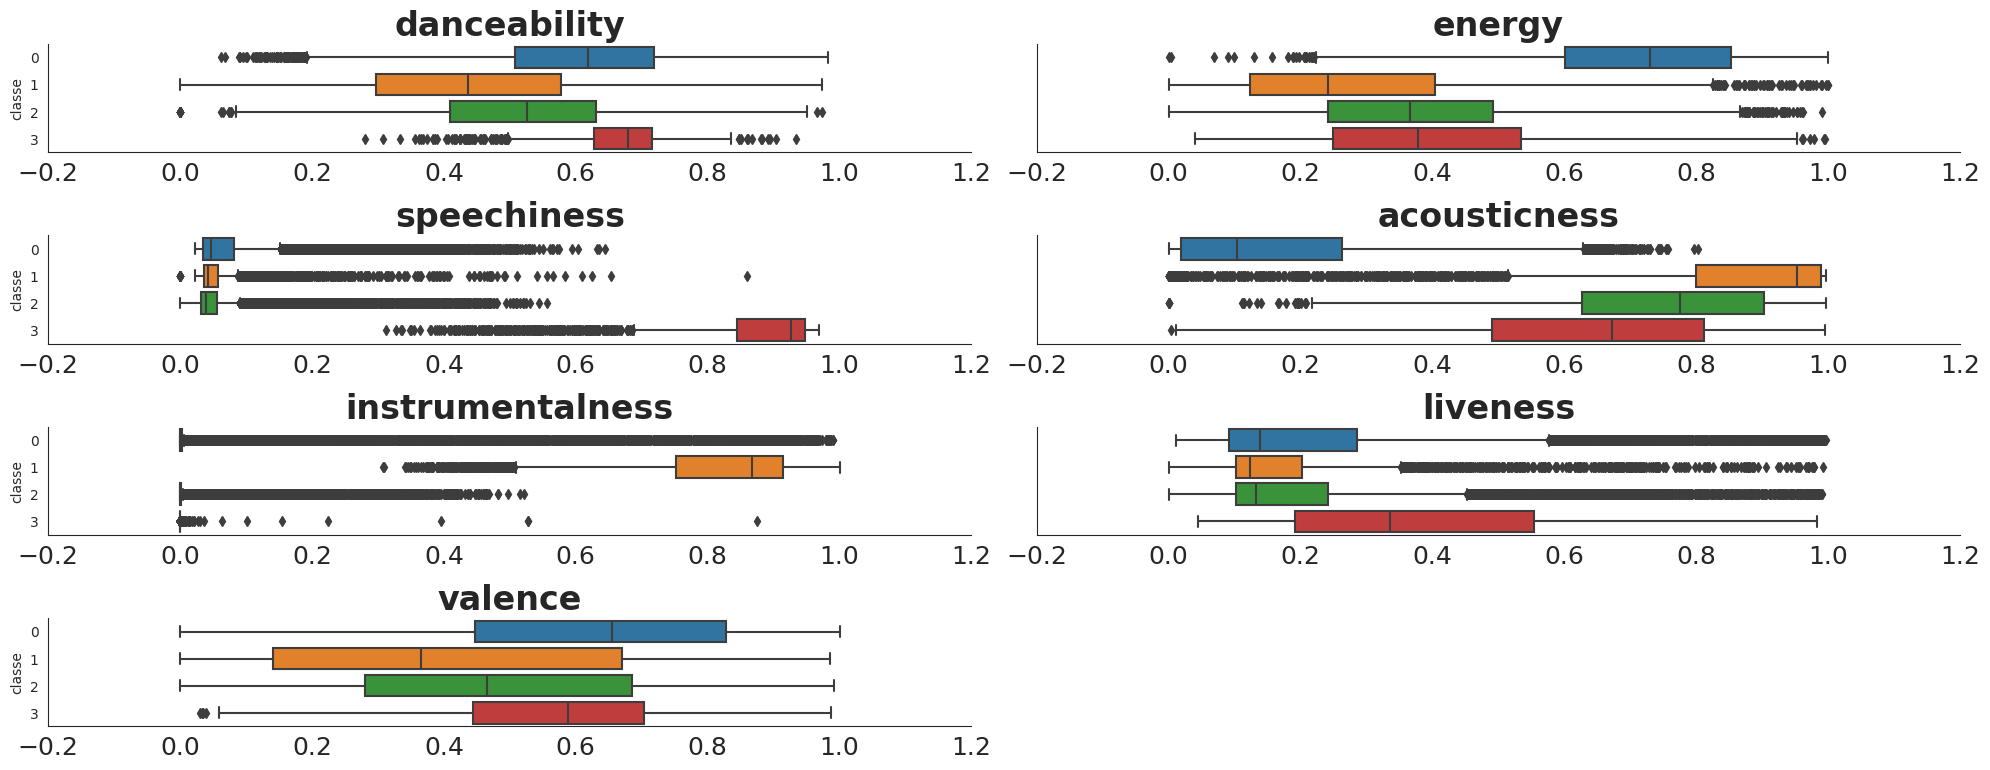

In [23]:
g = seaborn.catplot(
    data = spotify_sample.assign(classe=[str(v) for v in kmeans_4.labels_]) \
                .sort_values(by=["classe"]) \
                .melt(id_vars="classe"),
    x="value", y="classe",
    kind="box",
    col="variable", col_wrap=2, sharex=False,
    height=2, aspect=5
)
g.set_titles(col_template="{col_name}", fontweight="bold", size=24)
g.set_xticklabels(size=18)
g.tight_layout()
g.set_axis_labels(x_var="")
plt.show()

### Représentation sur le plan factoriel

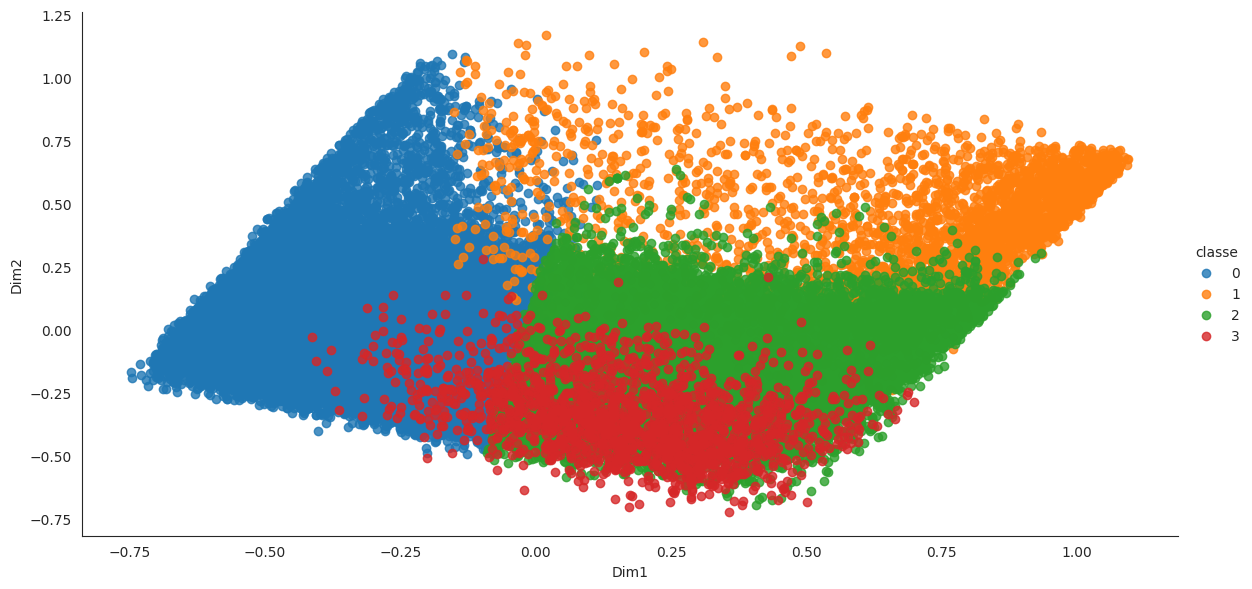

In [24]:
pca = PCA(n_components=2).fit(spotify_sample)
spotify_pca_row = pd.DataFrame(pca.transform(spotify_sample), columns=["Dim1", "Dim2"])
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe=kmeans_4.labels_), 
    x="Dim1", y="Dim2", hue="classe", fit_reg=False, 
    height=6, aspect=2)
plt.show()

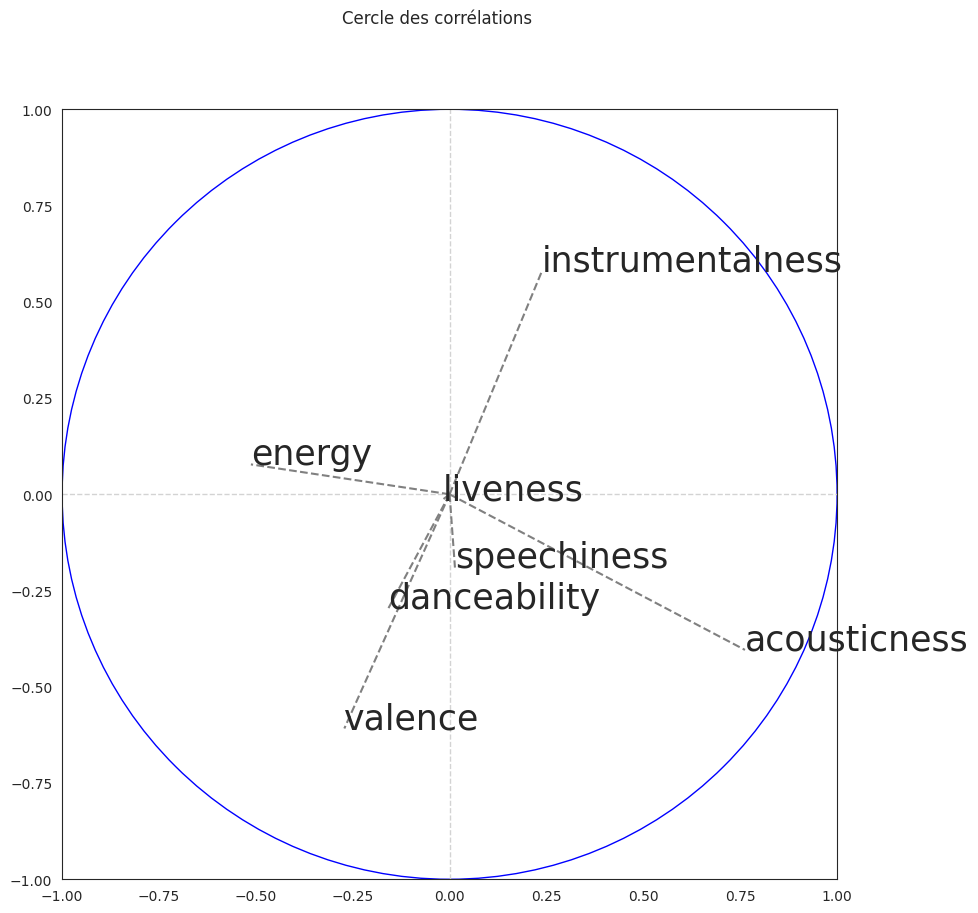

In [25]:
coordvar_df = pd.DataFrame(pca.components_.T, 
                               columns=['PC'+str(i+1) for i in range(spotify_pca_row.shape[1])], 
                               index=spotify_sample.columns)

fig, axes = plt.subplots(figsize=(10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x=0, color='lightgray', linestyle='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle='--', linewidth=1)
for j in range(spotify_01.shape[1]):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size=25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color="gray", linestyle='dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

### Et les autres variables

>Ne sont présentés ici que les graphiques montrant des informations intéressantes dans le comportement des classes sur les variables n'ayant pas participé au calcul de la partition.

In [26]:
spotify_mode_sample = spotify.sample(40000)

spotify_cl = spotify_mode_sample.assign(classe=kmeans_4.labels_)

#### Mode

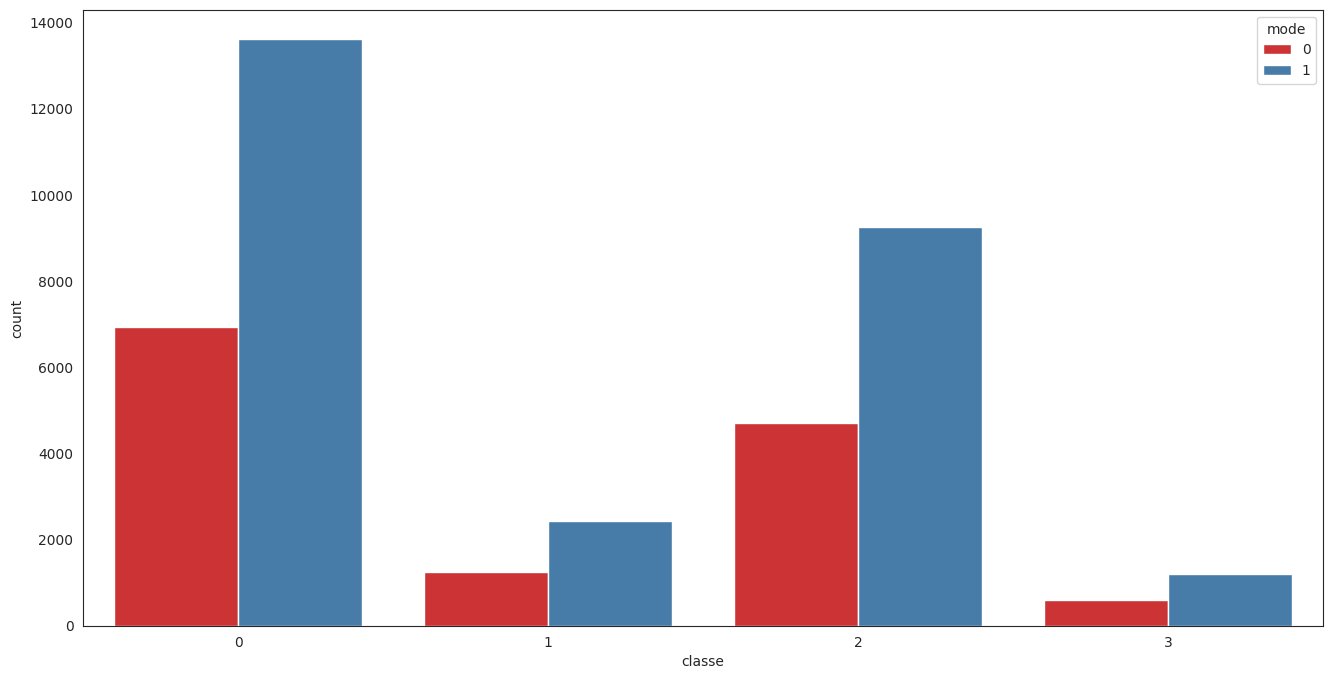

In [27]:
plt.figure(figsize=(16,8))
seaborn.countplot(data=spotify_cl, x="classe", hue="mode", palette="Set1")
plt.show()

Les classes 0 et 3 semblent avoir une part de chansons en mode 1 plus importantes.

#### Explicit

La mention « `Explicit` » est appliquée lorsque les paroles ou le contenu d'une chanson contiennent un ou plusieurs des critères suivants qui pourraient être considérés comme offensants ou inappropriés pour les mineurs: Un langage vulgaire (un seul mot suffit).

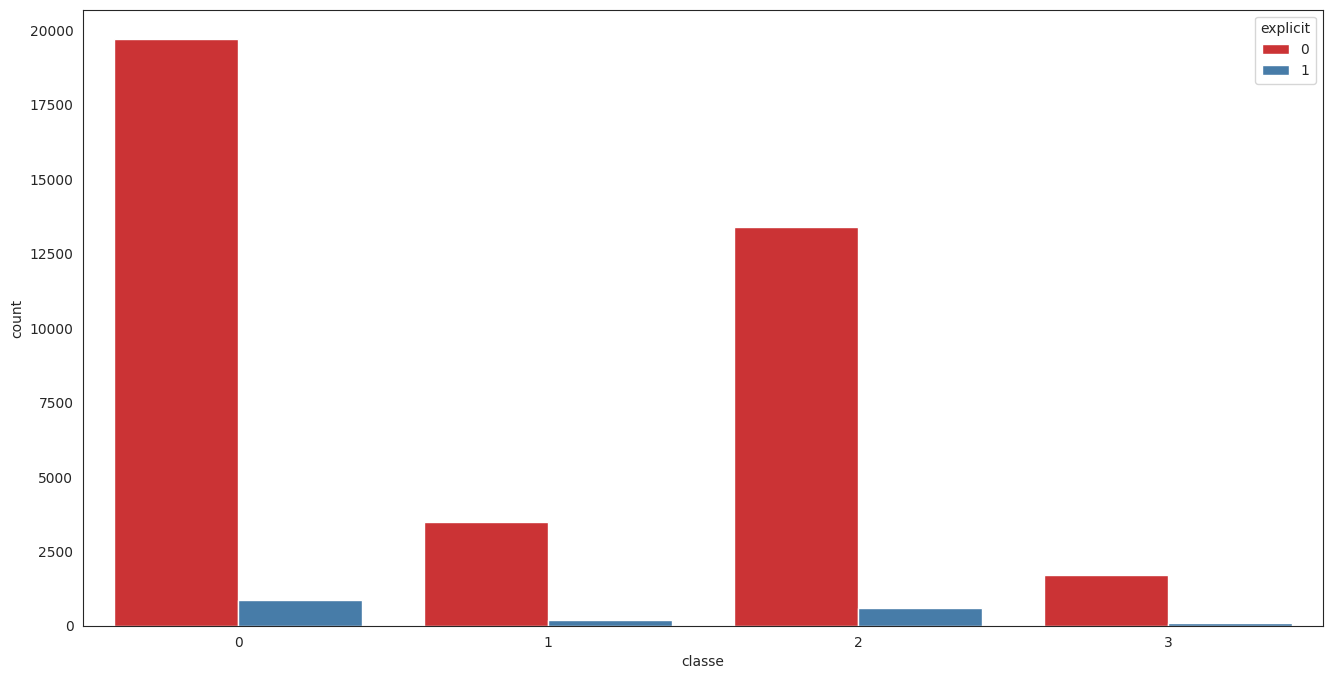

In [28]:
plt.figure(figsize = (16,8))
seaborn.countplot(data=spotify_cl, x="classe", hue="explicit", palette="Set1")
plt.show()

Dans les classes 0 et 3, nous avons majoritairement des chansons peu explicites (modalité 0) et toutes les classes ont trés peu voir pas de chansons explicites.

### Decennie

In [37]:
spotify_cl['year'] = spotify_cl['release_date'].apply(lambda x: x[:4])

In [31]:
def create_decennies_categ(x):
    if x < 1940:
        return '-40s'
    if (x >= 1940) & (x < 1950):
        return '40s'
    if (x >= 1950) & (x < 1960):
        return '50s'
    if (x >= 1960) & (x < 1970):
        return '60s'
    if (x >= 1970) & (x < 1980):
        return '70s'
    if (x >= 1980) & (x < 1990):
        return '80s'
    if (x >= 1990) & (x < 2000):
        return '90s'
    if (x >= 2000) & (x < 2010):
        return '2000s'
    if (x >= 2010) & (x < 2020):
        return '2010s'
    else:
        return '+2020s'


In [38]:
spotify_cl['year'] = spotify_cl['year'].astype(int)
spotify_cl['decade'] = spotify_cl['year'].apply(create_decennies_categ)

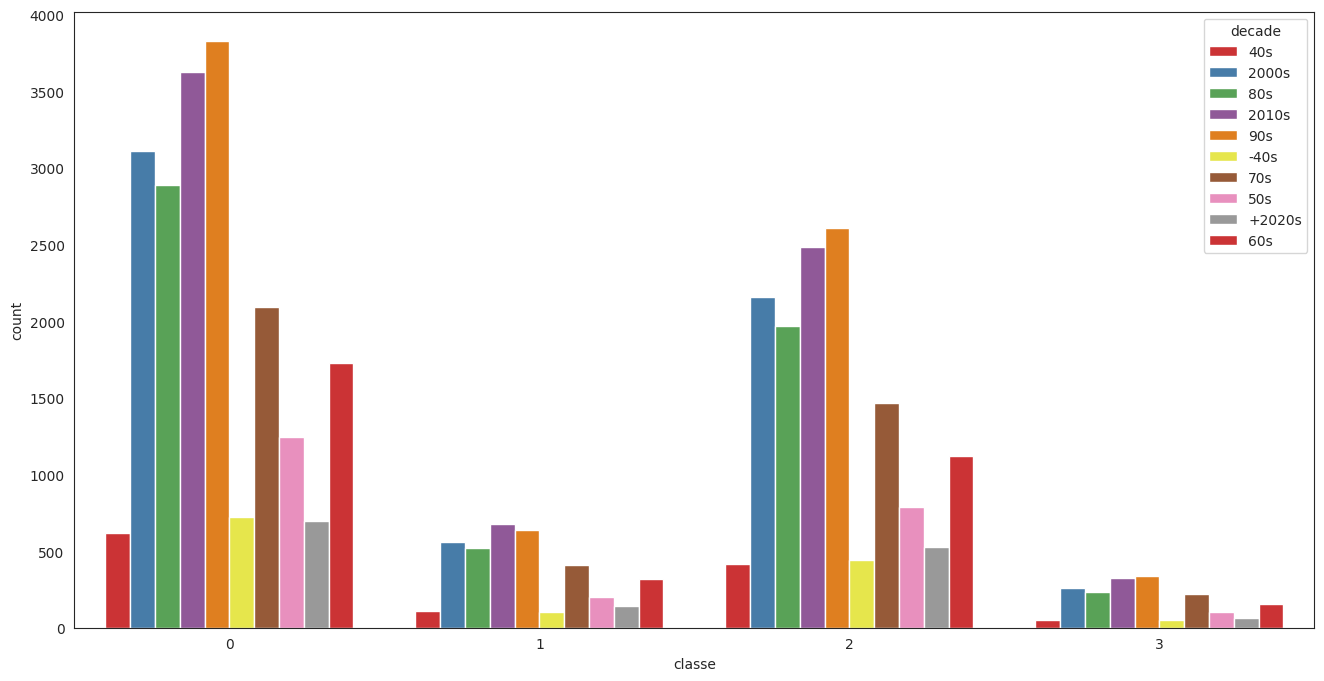

In [39]:
plt.figure(figsize=(16,8))
seaborn.countplot(data=spotify_cl, x="classe", hue="decade", palette="Set1")
plt.show()

Les classes ont l'air similaire avec un pic pour les années 90s et 2010s (la classe 1 représente légèrement des chansons plus récentes : le pic de 2010s est légèrement plus élevé que celui des années 90s, alors que pour les trois autres classes c'est l'inverse)

### Niveau sonore

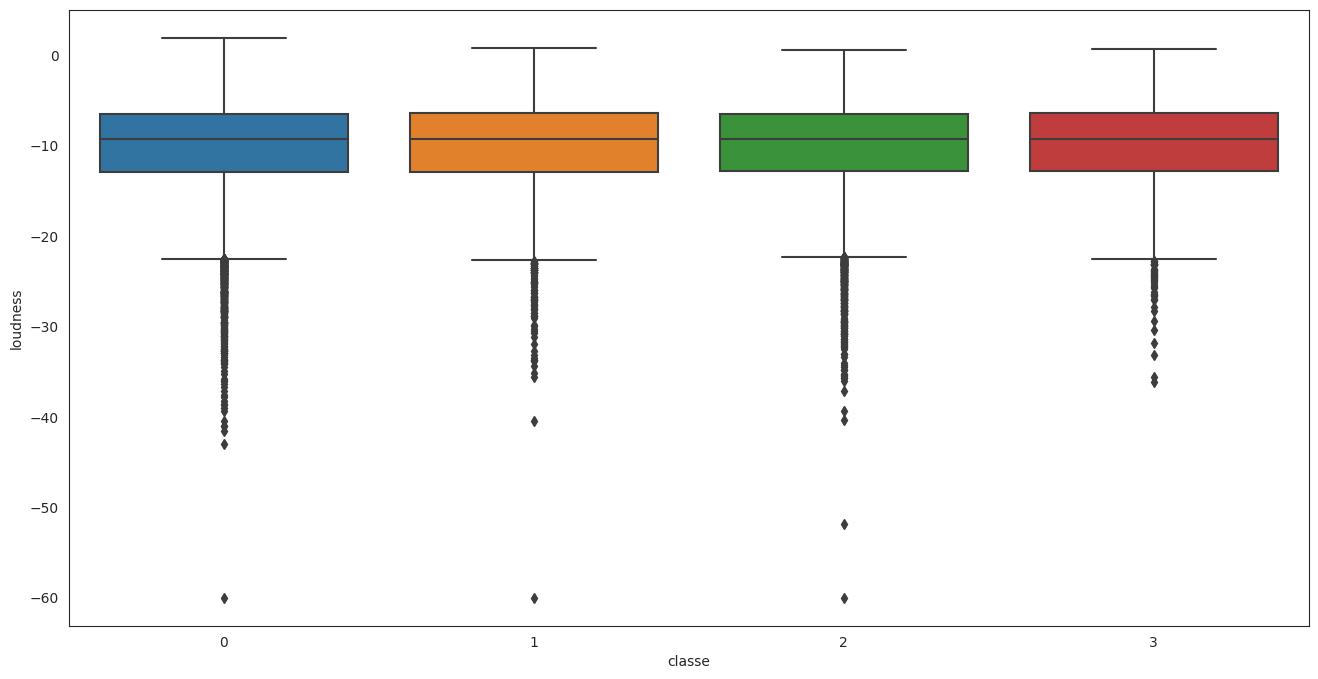

In [40]:
plt.figure(figsize=(16,8))
seaborn.boxplot(data=spotify_cl, x="classe", y="loudness")
plt.show()

Niveau similaire avec un peu plus d'outliers pour la classe 0 et 2

### Tempo

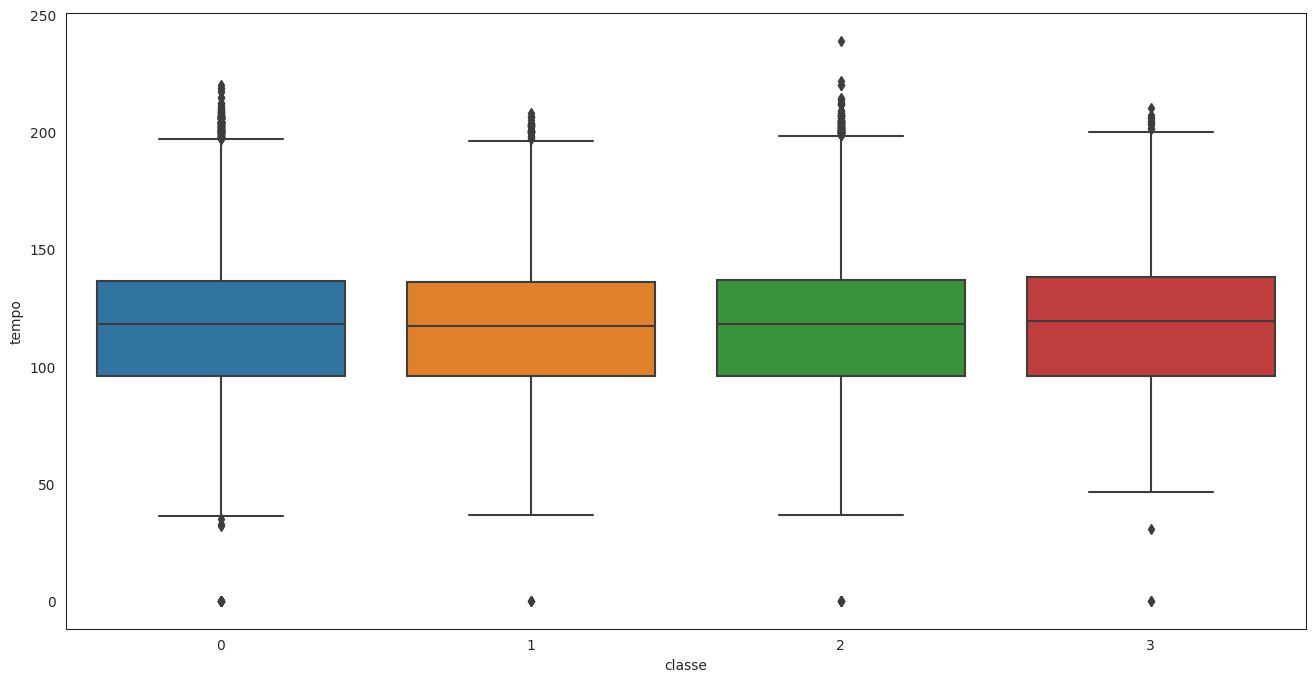

In [41]:
plt.figure(figsize=(16,8))
seaborn.boxplot(data=spotify_cl, x="classe", y="tempo")
plt.show()

Il ne semble pas y avoir de différence flagrante dans le tempo utilisé pour les chansons dans les différentes classes.

### Durée

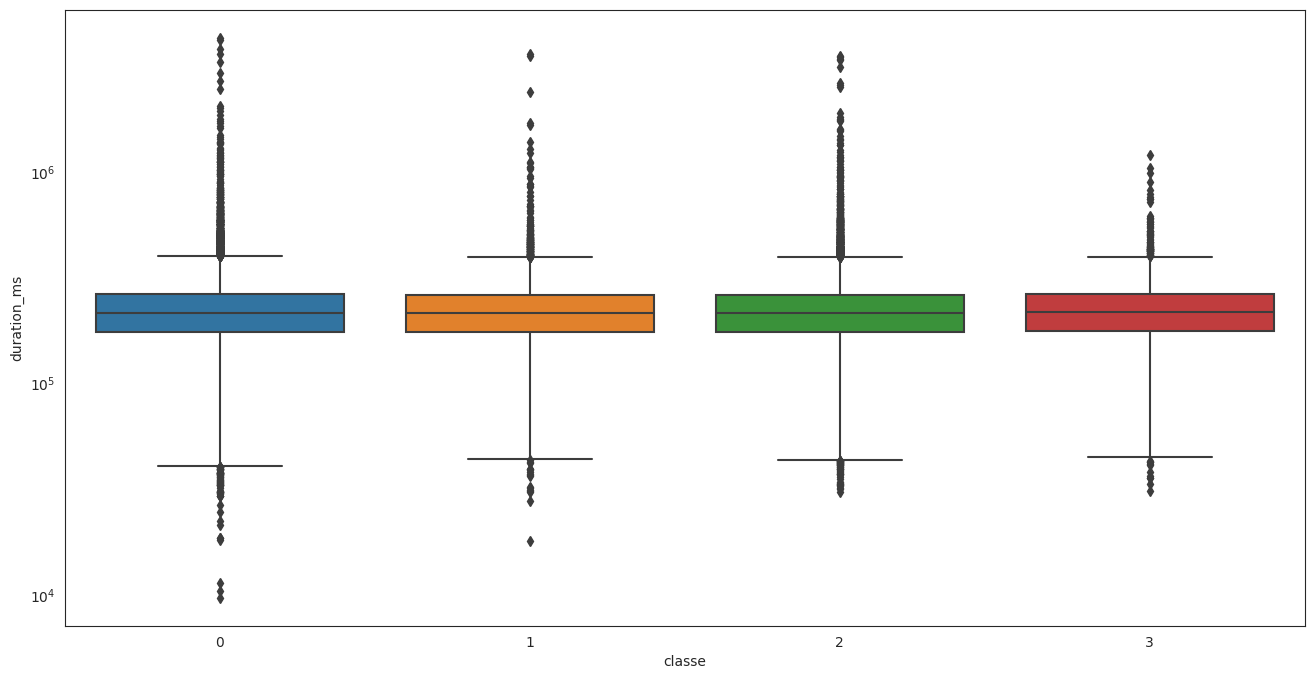

In [42]:
f,ax = plt.subplots(figsize=(16,8))
ax.set_yscale("log")

seaborn.boxplot(data=spotify_cl, x="classe", y="duration_ms")
plt.show()

> Ici, nous avons utilisé un axe logarthmique (en $y$) pour pouvoir représenter les différences entres les classes dans être impacté par les valeurs extrêmes (quelques chansons durent plus de 60 minutes)

Pas de différence notable non plus ici.

#### Représentation de la durée en minutes pour chaque classe

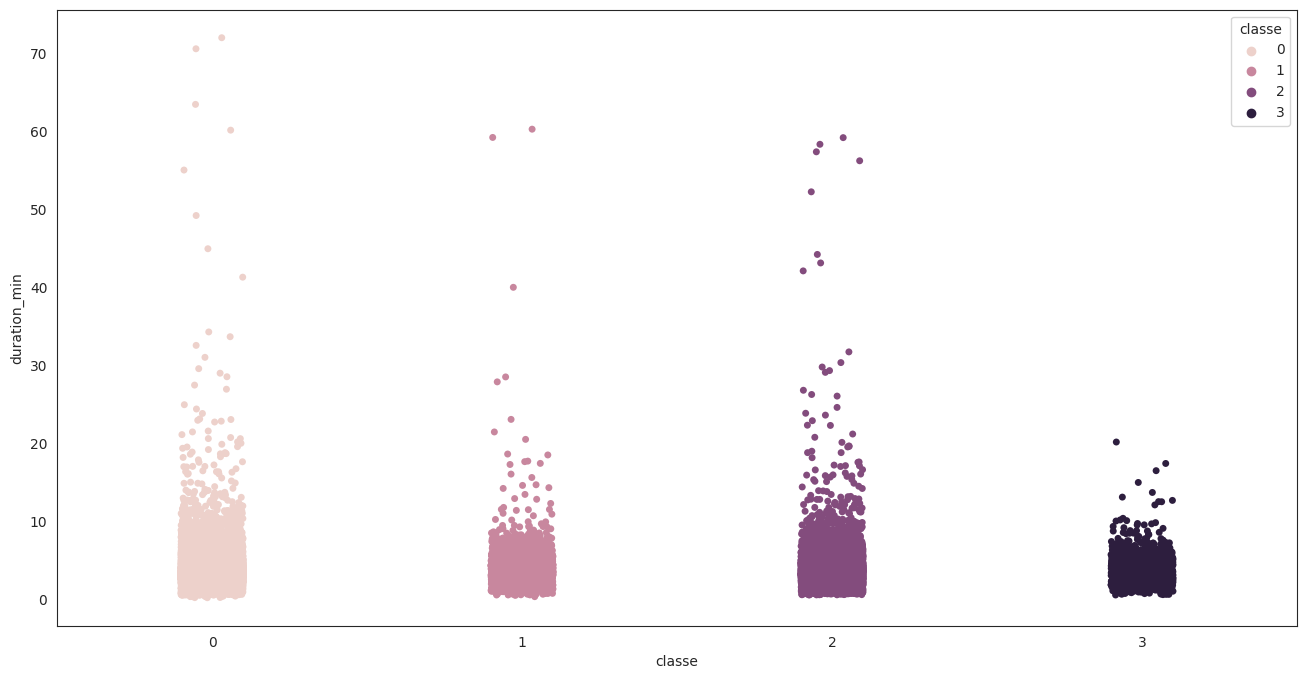

In [44]:
plt.figure(figsize=(16,8))
seaborn.stripplot(data=spotify_cl.assign(duration_min=spotify_cl.duration_ms / 1000 / 60), 
                  x="classe", y="duration_min", hue="classe")
plt.show()

On voit très bien ici que certaines chansons durent plus de 30 minutes.